In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv('./all_results.csv')
results['full_dataset_name'] = results.dataset_name.apply(lambda x: str(x).split('-')[0])

results.head()

,classifier_name,dataset_name,f1,accuracy,full_dataset_name
0,chrono_gam,Adiac-1.0,0.990703,0.982097,Adiac
1,chrono_gam,Adiac-2.0,0.982567,0.966752,Adiac
2,chrono_gam,Adiac-3.0,0.979751,0.961637,Adiac
3,chrono_gam,Adiac-4.0,0.992080,0.984655,Adiac
4,chrono_gam,Adiac-5.0,0.978559,0.959079,Adiac


### What is the distribution results of each methods?

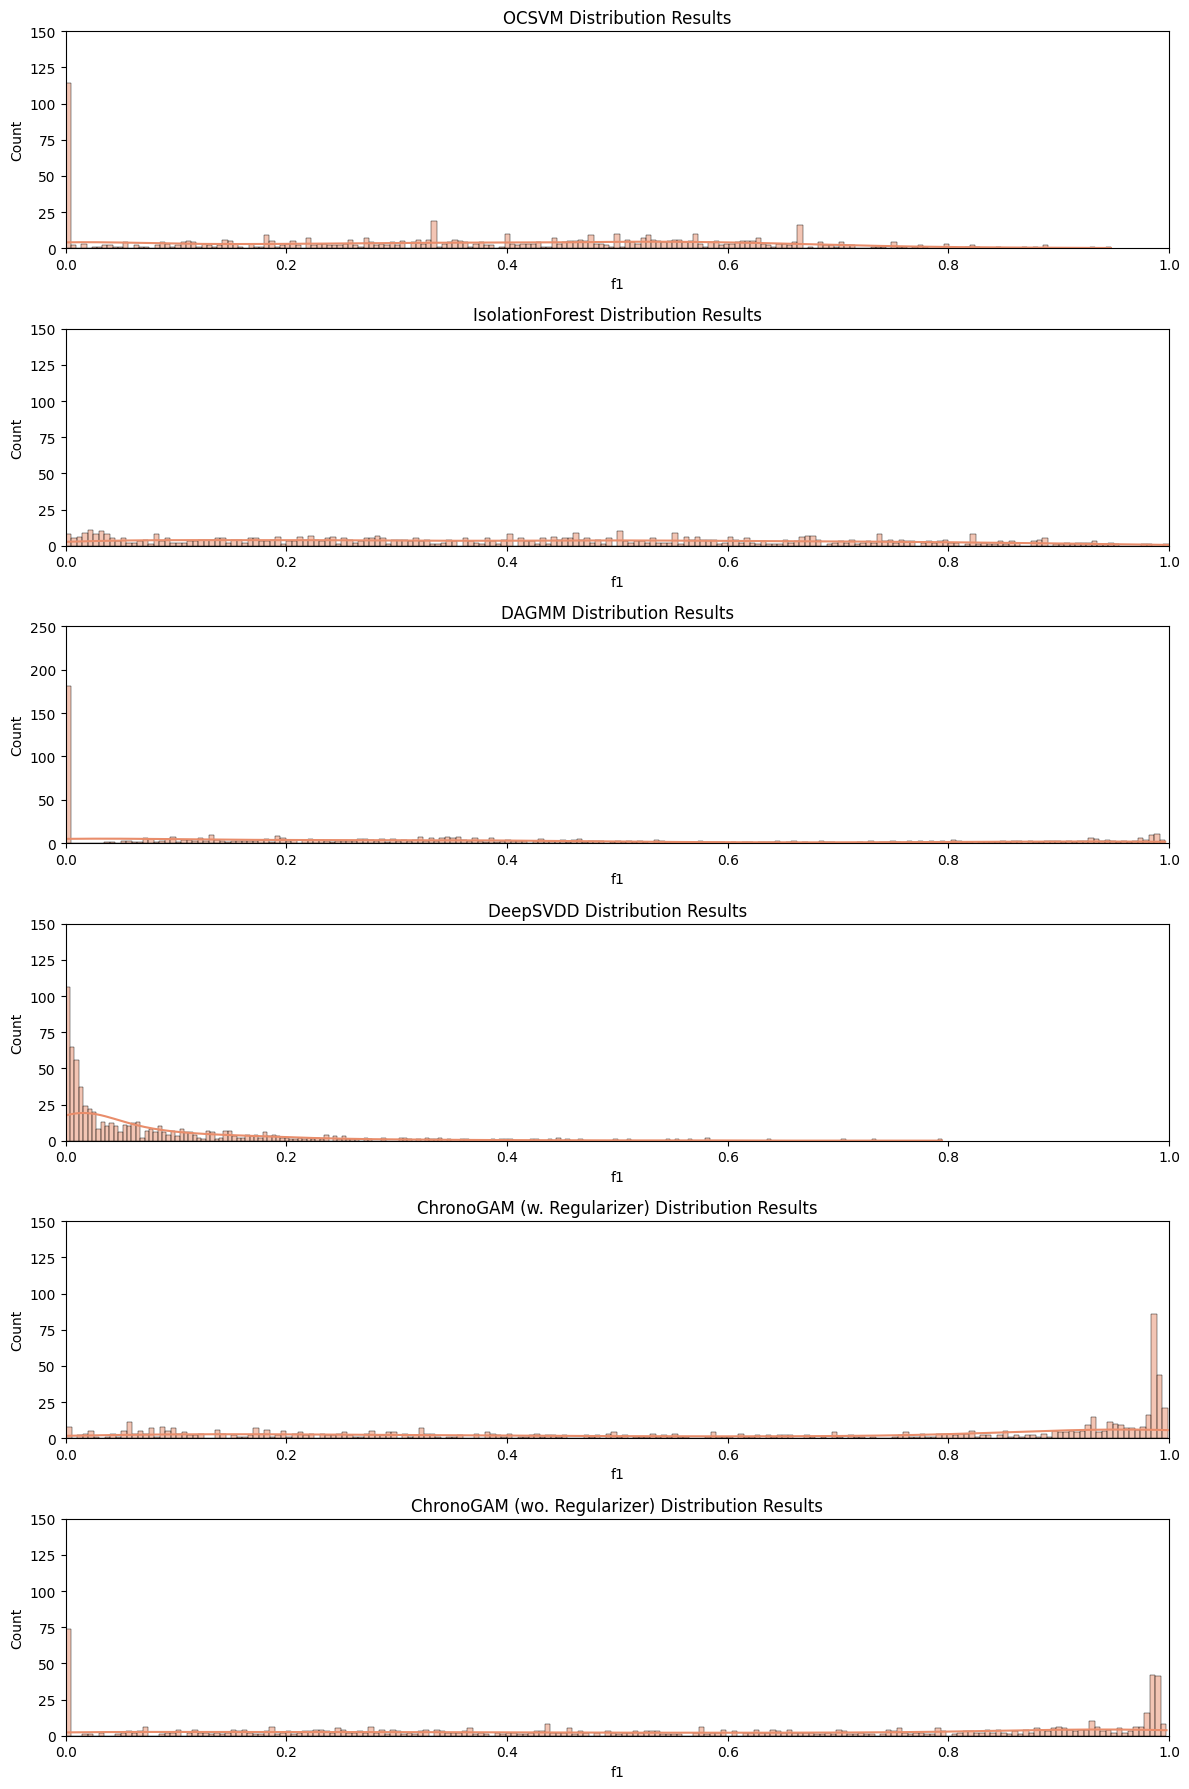

In [37]:
# plt.figure(figsize=(12, 3))
fig, axs = plt.subplots(6, 1, figsize=(12, 18))

sns.set_palette('flare')
sns.histplot(results.query('classifier_name == "ocsvm"'), x='f1', kde=True, bins=200, ax=axs[0]).set_title('OCSVM Distribution Results')

axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 150])

sns.histplot(results.query('classifier_name == "isolation-forest"'), x='f1', kde=True, bins=200, ax=axs[1]).set_title('IsolationForest Distribution Results')

axs[1].set_xlim([0, 1])
axs[1].set_ylim([0, 150])

sns.histplot(results.query('classifier_name == "dagmm"'), x='f1', kde=True, bins=200, ax=axs[2]).set_title('DAGMM Distribution Results')

axs[2].set_xlim([0, 1])
axs[2].set_ylim([0, 250])

sns.histplot(results.query('classifier_name == "deepsvdd"'), x='f1', kde=True, bins=200, ax=axs[3]).set_title('DeepSVDD Distribution Results')

axs[3].set_xlim([0, 1])
axs[3].set_ylim([0, 150])

sns.histplot(results.query('classifier_name == "chrono_gam"'), x='f1', kde=True, bins=200, ax=axs[4]).set_title('ChronoGAM (w. Regularizer) Distribution Results')

axs[4].set_xlim([0, 1])
axs[4].set_ylim([0, 150])

sns.histplot(results.query('classifier_name == "chrono_gam_old"'), x='f1', kde=True, bins=200, ax=axs[5]).set_title('ChronoGAM (wo. Regularizer) Distribution Results')

axs[5].set_xlim([0, 1])
axs[5].set_ylim([0, 150])

plt.tight_layout()
plt.show()


### How many cases we won/lost?

#### Winrate with only ChronoGAM without Regularizer

In [5]:
filtered = results.query('classifier_name != "chrono_gam"')

model_names = filtered.classifier_name.value_counts().index.values
datasets_names = filtered.dataset_name.value_counts().index.values

best_model_count = {
    model: [] for model in model_names
}
for dataset in datasets_names:
    best_model = None
    best_result = 0

    for model in model_names:
        row = filtered.query('classifier_name == @model and dataset_name == @dataset')  
        row_f1 = row.f1.values[0]

        if row_f1 >= best_result:
            best_model = model
            best_result = row_f1

    best_model_count[best_model].append(dataset)
    
for model in best_model_count.keys():
    print(model, len(best_model_count[model]))

chrono_gam_old 324
dagmm 70
deepsvdd 6
ocsvm 52
isolation-forest 200


#### Winrate count with only ChronoGAM with Regularizer

In [6]:
filtered = results.query('classifier_name != "chrono_gam_old"')

model_names = filtered.classifier_name.value_counts().index.values
datasets_names = filtered.dataset_name.value_counts().index.values

best_model_count = {
    model: [] for model in model_names
}
for dataset in datasets_names:
    best_model = None
    best_result = 0

    for model in model_names:
        row = filtered.query('classifier_name == @model and dataset_name == @dataset')  
        row_f1 = row.f1.values[0]

        if row_f1 >= best_result:
            best_model = model
            best_result = row_f1

    best_model_count[best_model].append(dataset)
    
for model in best_model_count.keys():
    print(model, len(best_model_count[model]))

chrono_gam 369
dagmm 72
deepsvdd 4
ocsvm 44
isolation-forest 163


Grouping the mean of the metrics for each grouped dataset may result in a meaningless information. [1, 2]  

Refs:  
[1] Demsar, Janez. Statistical Comparinsons of Classifiers over Multiple Data Sets. Journal of Machine Learning Research, 2006.  
[2] Ismail-Fawaz, Ali, et. al. An Approach to Multiple Comparinson Benchmark Evaluations that is Stable Under Manipulation of the Compared Set. Axiv 2305.11921, 2023.

#### Winrate count with ChronoGAM without Regularizer and Grouped Dataset

### Average F1 by dataset theme

In [29]:
UCR_DATASETS = ['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'Car', 'CBF', 'ChlorineConcentration',
                'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'DiatomSizeReduction',
                'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'Earthquakes',
                'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords',
                'Fish', 'FordA', 'FordB', 'GunPoint', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'InlineSkate', 'InsectWingbeatSound',
                'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages',
                'MiddlePhalanxOutlineAgeGroup','MiddlePhalanxOutlineCorrect','MiddlePhalanxTW','MoteStrain','NonInvasiveFetalECGThorax1',
                'NonInvasiveFetalECGThorax2','OliveOil','OSULeaf','PhalangesOutlinesCorrect','Phoneme','Plane','ProximalPhalanxOutlineAgeGroup',
                'ProximalPhalanxOutlineCorrect','ProximalPhalanxTW','RefrigerationDevices','ScreenType','ShapeletSim','ShapesAll','SmallKitchenAppliances',
                'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves', 'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl', 'ToeSegmentation1',
                'ToeSegmentation2','Trace','TwoLeadECG','TwoPatterns','UWaveGestureLibraryAll','UWaveGestureLibraryX','UWaveGestureLibraryY',
                'UWaveGestureLibraryZ','Wafer','Wine','WordSynonyms','Worms','WormsTwoClass','Yoga']

summary = pd.read_csv('./summary/data_summary.csv')
themes = summary.Type.value_counts().index.values

datasets_by_themes = {
    theme: [] for theme in themes
}

for row in summary[['Type', 'Name']].values:
    theme, dataset = row
    if dataset in UCR_DATASETS:
        datasets_by_themes[theme].append(dataset)

keys_to_remove = []
for key, value in datasets_by_themes.items():
    if len(value) > 0:
        print(f'{key}(#{len(value)})')
    else:
        keys_to_remove.append(key)


for key in keys_to_remove:
    datasets_by_themes.pop(key)


Image(#29)
Sensor(#18)
Motion(#14)
Device(#6)
Spectro(#7)
Simulated(#5)
ECG(#6)


In [36]:
models = results.classifier_name.value_counts().index.values
data = {
    'classifier_name': [],
    'dataset_name': [],
    'f1': [],
}


for theme, datasets in datasets_by_themes.items():
    print('-' * 10, f'Theme: {theme}', '-' * 10)
    for model in models:
        model_rows = results.query('classifier_name == @model and full_dataset_name in @datasets')
        print(f'\t{model} Mean Avg. F1: {model_rows.f1.mean()}')

        data['classifier_name'].append(model)
        data['dataset_name'].append(f'{theme}')
        data['f1'].append(model_rows.f1.mean())
    
    print()
    
    
results_by_theme = pd.DataFrame(data)
results_by_theme.to_csv('theme_results.csv', index=False)    

---------- Theme: Image ----------
	chrono_gam Mean Avg. F1: 0.6571179170881639
	chrono_gam_old Mean Avg. F1: 0.5772208628282336
	dagmm Mean Avg. F1: 0.35148406386733094
	deepsvdd Mean Avg. F1: 0.07064680981390743
	ocsvm Mean Avg. F1: 0.3312523593377718
	isolation-forest Mean Avg. F1: 0.36372959609650013

---------- Theme: Sensor ----------
	chrono_gam Mean Avg. F1: 0.5674487391803624
	chrono_gam_old Mean Avg. F1: 0.4128542811817407
	dagmm Mean Avg. F1: 0.2479159327734769
	deepsvdd Mean Avg. F1: 0.10259544467549919
	ocsvm Mean Avg. F1: 0.24597706303044028
	isolation-forest Mean Avg. F1: 0.36215227436311237

---------- Theme: Motion ----------
	chrono_gam Mean Avg. F1: 0.4968942789978226
	chrono_gam_old Mean Avg. F1: 0.5262041379774424
	dagmm Mean Avg. F1: 0.2893635517855066
	deepsvdd Mean Avg. F1: 0.09175724904262356
	ocsvm Mean Avg. F1: 0.31666033794705567
	isolation-forest Mean Avg. F1: 0.4225117208936077

---------- Theme: Device ----------
	chrono_gam Mean Avg. F1: 0.10367132481026

### Average F1 grouped by Series Length

In [43]:
UCR_DATASETS = ['Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'Car', 'CBF', 'ChlorineConcentration',
                'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'DiatomSizeReduction',
                'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxTW', 'Earthquakes',
                'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords',
                'Fish', 'FordA', 'FordB', 'GunPoint', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'InlineSkate', 'InsectWingbeatSound',
                'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages',
                'MiddlePhalanxOutlineAgeGroup','MiddlePhalanxOutlineCorrect','MiddlePhalanxTW','MoteStrain','NonInvasiveFetalECGThorax1',
                'NonInvasiveFetalECGThorax2','OliveOil','OSULeaf','PhalangesOutlinesCorrect','Phoneme','Plane','ProximalPhalanxOutlineAgeGroup',
                'ProximalPhalanxOutlineCorrect','ProximalPhalanxTW','RefrigerationDevices','ScreenType','ShapeletSim','ShapesAll','SmallKitchenAppliances',
                'SonyAIBORobotSurface1', 'SonyAIBORobotSurface2', 'StarLightCurves', 'Strawberry', 'SwedishLeaf', 'Symbols', 'SyntheticControl', 'ToeSegmentation1',
                'ToeSegmentation2','Trace','TwoLeadECG','TwoPatterns','UWaveGestureLibraryAll','UWaveGestureLibraryX','UWaveGestureLibraryY',
                'UWaveGestureLibraryZ','Wafer','Wine','WordSynonyms','Worms','WormsTwoClass','Yoga']

summary = pd.read_csv('./summary/data_summary.csv')

datasets_by_length = {
    '<81': [],
    '81-250': [],
    '251-450': [],
    '451-700': [],
    '701-1000': [],
    '>1000': []
}

for row in summary[['Type', 'Name', 'Length']].values:
    theme, dataset, length = row
    if dataset in UCR_DATASETS:
        length = int(length)

        if length < 81:
            datasets_by_length['<81'].append(dataset)
        elif length >= 81 and length <= 250:
            datasets_by_length['81-250'].append(dataset)
        elif length >= 251 and length <= 450:
            datasets_by_length['251-450'].append(dataset)
        elif length >= 451 and length <= 700:
            datasets_by_length['451-700'].append(dataset)
        elif length >= 701 and length <= 1000:
            datasets_by_length['701-1000'].append(dataset)
        else:
            datasets_by_length['>1000'].append(dataset)
            
keys_to_remove = []
for key, value in datasets_by_length.items():
    if len(value) > 0:
        print(f'{key}(#{len(value)})')
    else:
        keys_to_remove.append(key)


for key in keys_to_remove:
    datasets_by_length.pop(key)



<81(#14)
81-250(#19)
251-450(#22)
451-700(#13)
701-1000(#10)
>1000(#7)


In [44]:
models = results.classifier_name.value_counts().index.values

data = {
    'classifier_name': [],
    'dataset_name': [],
    'f1': [],
}

for length, datasets in datasets_by_length.items():
    print('-' * 10, f'Length: {length}', '-' * 10)
    for model in models:
        model_rows = results.query('classifier_name == @model and full_dataset_name in @datasets')
        print(f'\t{model} Mean Avg. F1: {model_rows.f1.mean()}')

        data['classifier_name'].append(model)
        data['dataset_name'].append(f'{length}')
        data['f1'].append(model_rows.f1.mean())
    
    print()

results_by_length = pd.DataFrame(data)
results_by_length.to_csv('length_results.csv', index=False)

---------- Length: <81 ----------
	chrono_gam Mean Avg. F1: 0.4447712451870566
	chrono_gam_old Mean Avg. F1: 0.2857673620793317
	dagmm Mean Avg. F1: 0.20456355839663146
	deepsvdd Mean Avg. F1: 0.2247710070083632
	ocsvm Mean Avg. F1: 0.4033838514021373
	isolation-forest Mean Avg. F1: 0.5577519137479506

---------- Length: 81-250 ----------
	chrono_gam Mean Avg. F1: 0.6170578202446964
	chrono_gam_old Mean Avg. F1: 0.5507325337581627
	dagmm Mean Avg. F1: 0.3327996845614206
	deepsvdd Mean Avg. F1: 0.06328438574947103
	ocsvm Mean Avg. F1: 0.3895757862100777
	isolation-forest Mean Avg. F1: 0.4052824171499967

---------- Length: 251-450 ----------
	chrono_gam Mean Avg. F1: 0.6366629658009985
	chrono_gam_old Mean Avg. F1: 0.5958585779297901
	dagmm Mean Avg. F1: 0.3425049317375947
	deepsvdd Mean Avg. F1: 0.07835427246192522
	ocsvm Mean Avg. F1: 0.2778666723482134
	isolation-forest Mean Avg. F1: 0.34410101833383705

---------- Length: 451-700 ----------
	chrono_gam Mean Avg. F1: 0.63616813425175

### Critical Difference Diagrams (Wilcoxon-Holm/Alpha Correction with Friedman to reject the null hipothesys)

#### Over all datasets

![](./cd-diagram-f1-all.png)

#### Datasets grouped by themes

![](./cd-diagram.png)

In [49]:
results.query('classifier_name == "chrono_gam"').sort_values(by='f1', ascending=False)

,classifier_name,dataset_name,f1,accuracy,full_dataset_name
211,chrono_gam,FiftyWords-44.0,0.998866,0.997802,FiftyWords
203,chrono_gam,FiftyWords-36.0,0.997731,0.995604,FiftyWords
202,chrono_gam,FiftyWords-35.0,0.997731,0.995604,FiftyWords
126,chrono_gam,ECG5000-5.0,0.997422,0.995111,ECG5000
195,chrono_gam,FiftyWords-28.0,0.996597,0.993407,FiftyWords
...,...,...,...,...,...
435,chrono_gam,Phoneme-32.0,0.002813,0.004219,Phoneme
436,chrono_gam,Phoneme-33.0,0.002184,0.002637,Phoneme
429,chrono_gam,Phoneme-26.0,0.001332,0.001582,Phoneme
413,chrono_gam,Phoneme-10.0,0.000938,0.001055,Phoneme
